In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from google.colab import files
import io
  

# Upload CSV to Google colab

In [2]:
#upload datasets_dataset.csv
uploaded = files.upload()

Saving datasets_dataset.csv to datasets_dataset.csv


# Random Forest

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['datasets_dataset.csv']))

# dorp rows with all zeros
df = df.loc[~(df==0).all(axis=1)]

df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [4]:
#im going to do the same thing as sepinoud to create train and test data

df['is_train'] = np.random.uniform(0,1,len(df)) <= 0.75

df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,is_train
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4,True
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4,True
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3,True
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3,True
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2,True


In [5]:
train = df[df['is_train'] == True]
test = df[df['is_train'] == False]

print(len(train), len(test))

80 27


In [6]:
#I want to get a list that does not contain ID, Grade, or is_train 


print(df.columns)

# get number of features
n_features = len(df.columns) - 2

print('\n\n')

# ID is index 0 so this works
features = df.columns[1:n_features] 

print(features)

# it worked

Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade',
       'is_train'],
      dtype='object')



Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat

In [7]:
# i want to run the run the model 20 times to get a mean value to compare results
# as it gives a lot of different scores for some reason

scores_rf_all = []

for i in range(20):
    clf_randomForest = RandomForestClassifier(n_jobs=2)
    clf_randomForest.fit(train[features], train['Grade'])
    
    accuracy = clf_randomForest.score(test[features], test['Grade'])
    scores_rf_all.append(accuracy)

scores_np = np.array(scores_rf_all)

print('Scores')
print(scores_np)

print('\nMean')
print(scores_np.mean())

print('\nStandard Deviation')
print(scores_np.std())

Scores
[0.96296296 1.         0.96296296 0.96296296 0.96296296 0.96296296
 0.96296296 0.96296296 0.96296296 0.96296296 0.92592593 1.
 0.92592593 0.96296296 1.         1.         0.96296296 0.96296296
 0.96296296 1.        ]

Mean
0.9685185185185183

Standard Deviation
0.02119541322640667


In [8]:
predicted = clf_randomForest.predict(test[features])

pd.crosstab(test['Grade'], predicted, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Predicted Grades,0,3,4,5
Actual Grades,,,,
0,14,0,0,0
3,0,5,0,0
4,0,0,6,0
5,0,0,0,2


In [9]:
# printing importance of features 

importance = list(zip(train[features], clf_randomForest.feature_importances_))

importance.sort(key = lambda x: x[1])

print('features sorted by importance\n')
for i in reversed(importance):
    print(i)

features sorted by importance

('Week7_MP3', 0.14752022729714917)
('Week8_Total', 0.14377020670572255)
('Week5_MP2', 0.07443558597063746)
('Week7_Stat0', 0.04499993072420054)
('Week3_PR1', 0.03602816215503177)
('Week3_MP1', 0.035841190472706445)
('Week4_Quiz2', 0.03487295444266392)
('Week5_Stat1', 0.034293650892037834)
('Week3_Stat0', 0.03141138392943997)
('Week5_PR2', 0.03088076113763519)
('Week4_Stat0', 0.03033153426074398)
('Week6_Stat1', 0.021289766580788926)
('Week4_Stat1', 0.020544283819097776)
('Week1_Stat0', 0.020051915288866868)
('Week6_Stat2', 0.019057061054643068)
('Week7_PR3', 0.019046042083336524)
('Week5_Stat0', 0.018088231048517315)
('Week3_Stat1', 0.01805539601060876)
('Week9_Stat0', 0.017634482227971326)
('Week8_Stat1', 0.017438150488980068)
('Week2_Quiz1', 0.015840467268632967)
('Week2_Stat0', 0.014792303099799502)
('Week8_Stat0', 0.014281160711317797)
('Week6_Quiz3', 0.013886819222626632)
('Week6_Stat0', 0.013179792003988946)
('Week9_Stat1', 0.012674529428992816)
('W

Week8_Total is the total points a person has gotten.\
Which means it is 100% correlated with the grade.\
So the accuracy of this model is pretty much meaningless as we are basically cheating.

# Visualisation of most important features

In [10]:
import matplotlib.pyplot as plt

In [11]:
# get last 10 items
most_important = [x[0] for x in importance[-15:]]

print('Important features:\n{}'.format(most_important))

Important features:
['Week6_Stat2', 'Week1_Stat0', 'Week4_Stat1', 'Week6_Stat1', 'Week4_Stat0', 'Week5_PR2', 'Week3_Stat0', 'Week5_Stat1', 'Week4_Quiz2', 'Week3_MP1', 'Week3_PR1', 'Week7_Stat0', 'Week5_MP2', 'Week8_Total', 'Week7_MP3']


<Figure size 432x288 with 0 Axes>

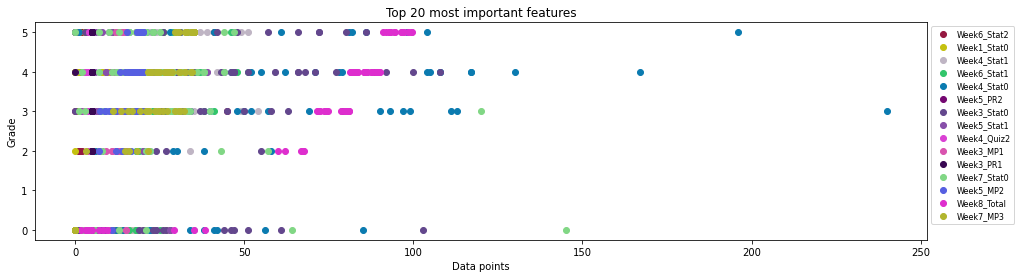

In [12]:
# lets plot the most important features

f = plt.figure()
plt.figure(figsize=(16, 4))

plt.title('Top 20 most important features')
plt.xlabel('Data points')
plt.ylabel('Grade')

for f in most_important:
  col = (np.random.random(), np.random.random(), np.random.random())

  pltX = df.loc[:, f]
  pltY = df.loc[:,'Grade']
  plt.scatter(pltX, pltY, color=col, label=f)

plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size':8})
plt.show()

In [13]:
# i have run the model many times 
# importance values are inconsistent
# and the Stat features are always very scattered
# so i am just going to remove them
# Week8_Total is 100% correlated with the grade so lets also remove it

to_remove = []

for f in most_important:
  if 'Stat' in f:
    to_remove.append(f)
  elif 'Total' in f: 
    to_remove.append(f)

for f in to_remove:
  most_important.remove(f)

for f in reversed(most_important):
  print(f)

Week7_MP3
Week5_MP2
Week3_PR1
Week3_MP1
Week4_Quiz2
Week5_PR2


<Figure size 432x288 with 0 Axes>

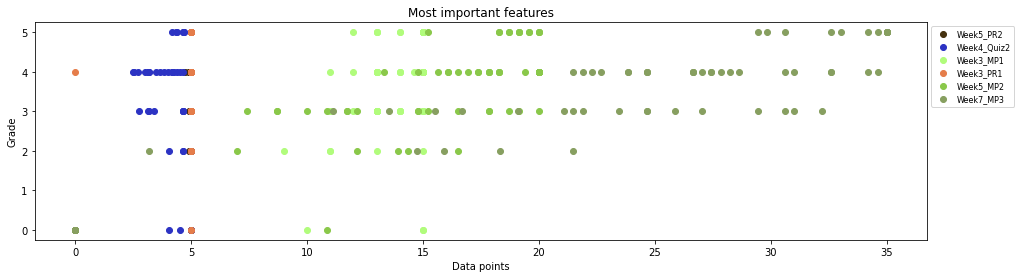

In [14]:
# lets plot the most important features

f = plt.figure()
plt.figure(figsize=(16, 4))

plt.title('Most important features')
plt.xlabel('Data points')
plt.ylabel('Grade')

for f in most_important:
  col = (np.random.random(), np.random.random(), np.random.random())

  pltX = df.loc[:, f]
  pltY = df.loc[:,'Grade']
  plt.scatter(pltX, pltY, color=col, label=f)

plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size':8})
plt.show()


# looks better

# Random forest with the most important features

In [15]:
# training and scoring the model 20 times again

scores_rf_mostImportant = []
for i in range(20):
    clf_randomForest = RandomForestClassifier(n_jobs=2)
    clf_randomForest.fit(train[most_important], train['Grade'])
    
    accuracy = clf_randomForest.score(test[most_important], test['Grade'])
    scores_rf_mostImportant.append(accuracy)  
    
scores_np = np.array(scores_rf_mostImportant)

print('Scores')
print(scores_np)

print('\nMean')
print(scores_np.mean())

print('\nStandard Deviation')
print(scores_np.std())


# the accuracy doesent really change but concidering im not using te total points
# my model is very good at perdicting

Scores
[0.92592593 0.92592593 0.92592593 0.92592593 0.92592593 0.85185185
 0.92592593 0.92592593 0.92592593 0.92592593 0.92592593 0.92592593
 0.92592593 0.92592593 0.92592593 0.92592593 0.92592593 0.92592593
 0.92592593 0.92592593]

Mean
0.9222222222222223

Standard Deviation
0.016144070161261757


# Naive Bayes Gaussian

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv(io.BytesIO(uploaded['datasets_dataset.csv']))

array = df.values

X = array[:,1:-1]
Y = array[:,-1]

Y = Y.astype('int') # this is needed for some reason ?!?!?!?!?!?!

In [18]:
# im creating a model 20 times and saving the accuracy

validation_size = 0.25

scores_nbg_all = []

for i in range(20):
    clf_GNB = GaussianNB()
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size)
    clf_GNB.fit(X_train, Y_train) 
    accuracy = clf_GNB.score(X_validation, Y_validation)
    scores_nbg_all.append(accuracy)
    
scores_np = np.array(scores_nbg_all)

print('Scores')
print(scores_np)

print('\nMean')
print(scores_np.mean())

print('\nStandard Deviation')
print(scores_np.std())


# this accuracy is really bad

Scores
[0.59259259 0.7037037  0.51851852 0.66666667 0.77777778 0.66666667
 0.77777778 0.7037037  0.62962963 0.74074074 0.66666667 0.7037037
 0.74074074 0.62962963 0.74074074 0.81481481 0.77777778 0.62962963
 0.59259259 0.62962963]

Mean
0.6851851851851853

Standard Deviation
0.07453559924999298


In [19]:
# i will use only the most important features again

df_mostImportant = df[most_important]
array = df.values

X = df_mostImportant.values
Y = array[:,-1]

Y = Y.astype('int') 

In [20]:
# im creating a model 20 times and saving the accuracy

validation_size = 0.25

scores_nbg_mostImportant = []

for i in range(20):
    clf_GNB = GaussianNB()
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size)
    clf_GNB.fit(X_train, Y_train) 
    accuracy = clf_GNB.score(X_validation, Y_validation)
    scores_nbg_mostImportant.append(accuracy)
    
scores_np = np.array(scores_nbg_mostImportant)

print('Scores')
print(scores_np)

print('\nMean')
print(scores_np.mean())

print('\nStandard Deviation')
print(scores_np.std())


# this accuracy is better

Scores
[0.92592593 0.59259259 0.92592593 0.7037037  0.77777778 0.74074074
 0.74074074 0.81481481 0.59259259 0.74074074 0.66666667 0.77777778
 0.81481481 0.66666667 0.7037037  0.66666667 0.85185185 0.66666667
 0.74074074 0.55555556]

Mean
0.7333333333333332

Standard Deviation
0.09910435674266409


# Visualization of performance

In [25]:



pltX = scores_rf_all
pltY = ['Random Forest all' for i in scores]
plt.scatter(pltX, pltY, color='red', label='Random Forest all')

pltX = scores_rf_mostImportant
pltY = ['Random Forest most important' for i in scores]
plt.scatter(pltX, pltY, color='blue', label='Random Forest most important')

pltX = scores_nbg_all
pltY = ['Naive Bayes all' for i in scores]
plt.scatter(pltX, pltY, color='green', label='Naive Bayes all')

pltX = scores_nbg_mostImportant
pltY = ['Naive Bayes important' for i in scores]
plt.scatter(pltX, pltY, color='purple', label='Naive Bayes important')

plt.title('Accuracy scores of 20 runs of different models')
plt.xlabel('Accuracy')
plt.ylabel('Model')

plt.show()

NameError: ignored